### Introduction

#### Spam Email Classification using Logistic Regression

##### Project Overview
This notebook presents a machine learning approach to classify emails as spam or not spam. The analysis utilizes the "SMS Spam Collection" dataset from Kaggle. The goal is to apply a Logistic Regression model with L1 regularization and evaluate it using metrics such as the confusion matrix and ROC curve.

##### Objectives
- Preprocess text data through tokenization, removing stop words, and vectorization.
- Train a Logistic Regression model with L1 regularization.
- Evaluate the model's performance.

### Data Loading

In [99]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
# import data
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df.head(10))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        NaN  
6        NaN  

### Data Preprocessing

The preprocessing steps include renaming columns for better readability, mapping labels to binary format, and preparing the text data by removing stop words and applying vectorization.


In [101]:
# Clean and prepare data
df = df.rename(columns={"v1": "label", "v2": "text"})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Vectorization
X = vectorizer.fit_transform(df['text'])
y = df['label']

### Model Training

Here we split the data into training and testing sets, and train a Logistic Regression model with L1 regularization.

In [102]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model initialization and training
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

### Model Evaluation

After training the model, it is crucial to assess its performance using several metrics to understand its effectiveness in classifying emails as spam or not. We will use the confusion matrix, accuracy, precision, recall, F1-score, and the ROC curve.


Confusion Matrix:
[[1450    3]
 [  34  185]]
Accuracy: 0.9779
Precision: 0.9840
Recall: 0.8447
F1 Score: 0.9091


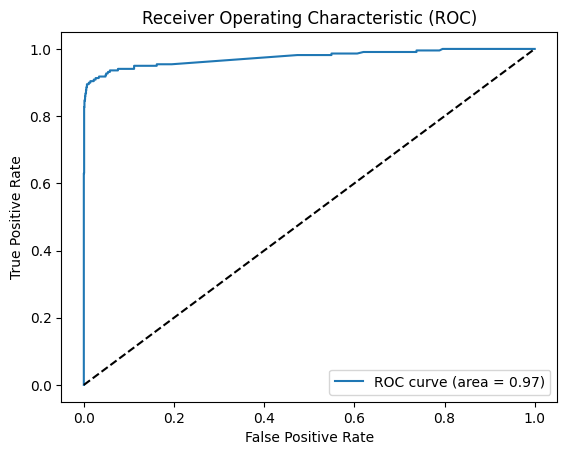

In [104]:
# Prediction
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Conclusion

In this project, we applied a Logistic Regression model with L1 regularization to classify emails as spam or not. The model's performance was evaluated using various metrics, demonstrating its effectiveness in classifying spam emails. Future work could explore more complex models or feature engineering techniques to improve accuracy.

### References

1. Kaggle Dataset: [Link to the SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)
2. Scikit-learn Documentation: [Link to scikit-learn](https://scikit-learn.org)
